## Importing LIbraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://raw.githubusercontent.com/LearnwithStudents/Data-Analysis-Top_200_youtubers_data-/main/top_200_youtubers.csv'

In [3]:
data = pd.read_csv(url)

In [4]:
data.head()

,Country,Channel Name,Category,Main Video Category,username,followers,Main topic,More topics,Likes,Boost Index,...,Views,Views Avg.,Avg. 1 Day,Avg. 3 Day,Avg. 7 Day,Avg. 14 Day,Avg. 30 day,Avg. 60 day,Comments Avg,Youtube Link
0,IN,T-Series,Gaming & Apps,Music,T-Series,220000000,Music of Asia,"Entertainment,Music of Asia,Music,Movies",1.602680e+09,83,...,195660744416,2.095329e+06,1.522448e+05,2134569.625,1.809830e+06,2.306178e+06,1.676330e+06,2.295416e+06,4493.984146,UCq-Fj5jknLsUf-MWSy4_brA
1,US,ABCkidTV - Nursery Rhymes,Gaming & Apps,Education,ABCkidTV - Nursery Rhymes,138000000,Movies,"Entertainment,Music,Movies",2.209901e+08,63,...,133025325473,7.027126e+07,1.837916e+06,1837916.000,4.891832e+06,7.052576e+06,1.265433e+07,1.572284e+07,146.700252,UCbCmjCuTUZos6Inko4u57UQ
2,IN,SET India,Gaming & Apps,Shows,SET India,137000000,Movies,"Entertainment,TV shows,Music,Movies",1.748752e+08,79,...,121741739317,1.095729e+05,NaN,586040.000,2.801276e+05,3.437881e+05,3.536019e+05,3.220336e+05,76.244316,UCpEhnqL0y41EpW2TvWAHD7Q
3,US,PewDiePie,Gaming & Apps,Gaming,PewDiePie,111000000,Lifestyle,"Gaming,Action game,Lifestyle,Action-adventure ...",2.191406e+09,88,...,28424113942,7.718345e+06,NaN,NaN,3.497395e+06,3.094440e+06,3.620274e+06,4.454120e+06,35839.781347,UC-lHJZR3Gqxm24_Vd_AJ5Yw
4,US,MrBeast,Gaming & Apps,Entertainment,MrBeast,98100000,Lifestyle,"Entertainment,Lifestyle,Technology",1.731833e+09,60,...,16242634269,9.876250e+07,NaN,NaN,2.994102e+07,2.994102e+07,2.994102e+07,5.343473e+07,113432.373684,UCX6OQ3DkcsbYNE6H8uQQuVA


In [5]:
data.drop_duplicates(subset='Channel Name', keep='first', inplace=True, ignore_index=False)

In [6]:
data['Channel Name']

0                       T-Series
1      ABCkidTV - Nursery Rhymes
2                      SET India
3                      PewDiePie
4                        MrBeast
                 ...            
652                 1theK (원더케이)
653                  Post Malone
654                 Amit Bhadana
655                James Charles
656                      Netflix
Name: Channel Name, Length: 200, dtype: object

### Which country has the highest number of top youtubers?

In [7]:
country = data.Country.value_counts().nlargest(10)
country

US    67
IN    45
BR     8
CA     4
IE     3
ID     3
CO     3
TH     3
KR     3
MX     3
Name: Country, dtype: int64

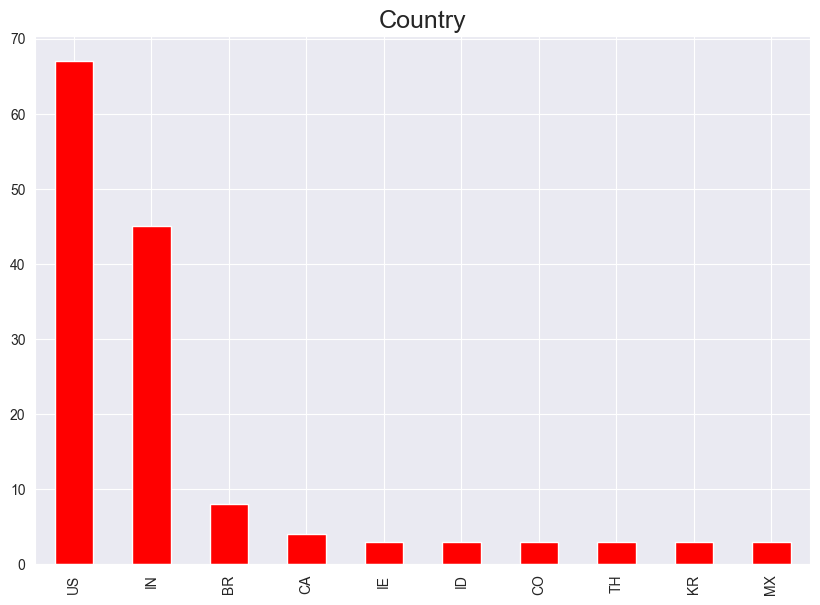

In [8]:
plt.figure(figsize = (10, 7), dpi=100)
country.plot.bar(color='#ff0000')
plt.title("Country", fontsize=18)
plt.show()

### Which Youtube Channel has the highest number of likes?

In [9]:
likes = data.groupby('Channel Name')['Likes'].sum().nlargest(10)

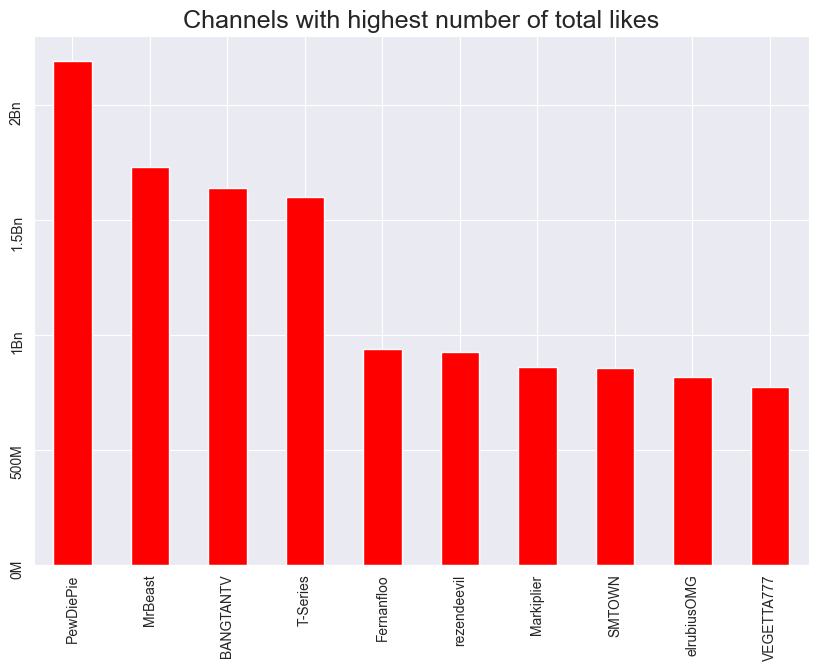

In [10]:
plt.figure(figsize =(10, 7), dpi=100)
likes.plot.bar(color='#ff0000')
plt.yticks([0.00e+09,0.50e+09,1.00e+09,1.50e+09,2.00e+09],labels = ['0M','500M','1Bn','1.5Bn','2Bn'],rotation=90)
plt.xlabel("")
plt.title("Channels with highest number of total likes", fontsize=18)
plt.show()

### Which Youtube Channel has the highest number of subscribers?

In [11]:
subscribers = data.groupby('Channel Name')['followers'].sum().nlargest(10)

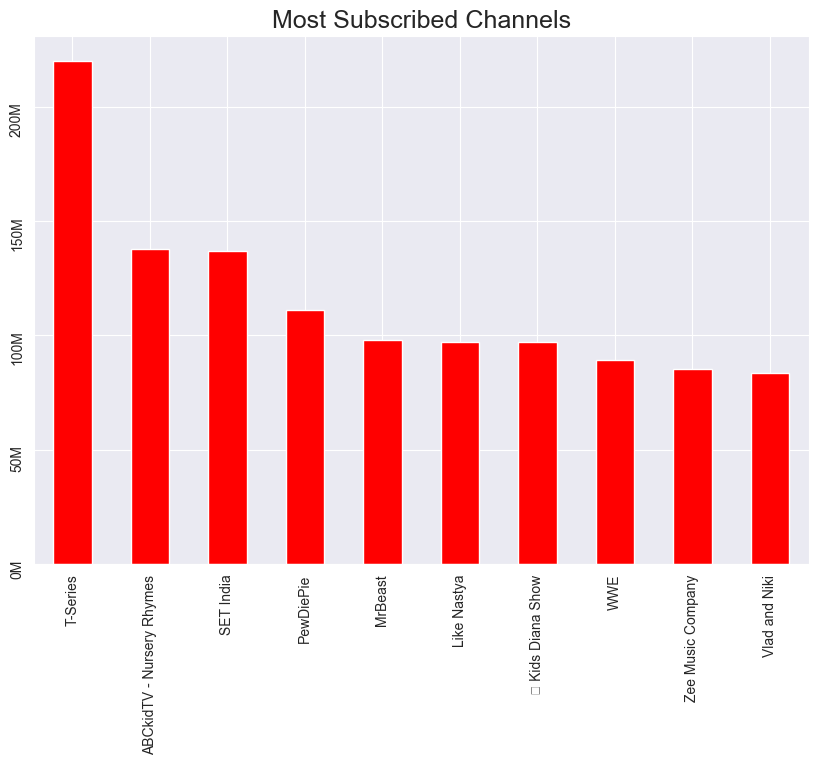

In [12]:
plt.figure(figsize =(10, 7), dpi=100)
subscribers.plot.bar(color='#ff0000')
plt.yticks([0.00e+08,0.50e+08,1.00e+08,1.50e+08,2.00e+08],labels = ['0M','50M','100M','150M','200M'],rotation=90)
plt.xlabel("")
plt.title("Most Subscribed Channels", fontsize=18)
plt.show()

### What is the relationship between the number of subscribers and Engagement Rate?

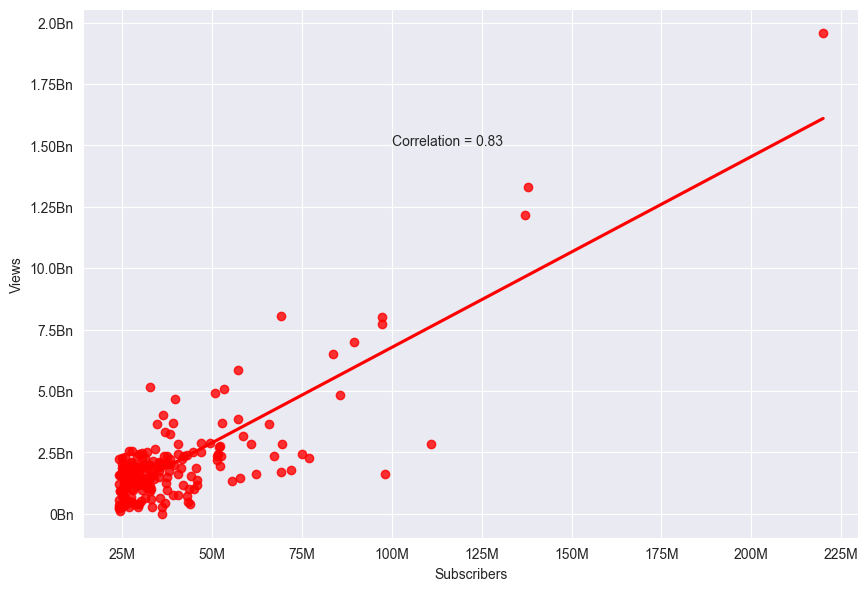

In [13]:
fig = plt.figure(figsize =(10, 7), dpi=100)
sns.regplot(data.followers,data.Views,color='#FF0000', ci=None)
correlation = data.followers.corr(data.Views)

plt.yticks([0.00e+11, 2.50e+10, 5.00e+10, 7.50e+10, 1.00e+11, 1.25e+11,
  1.50e+11, 1.75e+11, 2.00e+11], labels = ['0Bn','2.5Bn','5.0Bn','7.5Bn','10.0Bn','1.25Bn','1.50Bn','1.75Bn','2.0Bn'] )

plt.xticks([2.50e+07, 5.00e+07, 7.50e+07, 1.00e+08, 1.25e+08, 1.50e+08,
       1.75e+08, 2.00e+08, 2.25e+08], labels = ['25M', '50M', '75M', '100M', '125M', '150M','175M','200M','225M'])

plt.xlabel("Subscribers")
plt.ylabel("Views")
plt.text(1.00e+8,1.5e+11, 'Correlation = {:.2f}'.format(correlation) )
plt.show()

In [14]:
data['Main Video Category'].value_counts().nlargest(5)

Music             70
Entertainment     46
Gaming            16
Comedy            14
People & Blogs    12
Name: Main Video Category, dtype: int64

In [15]:
data['Main Video Category'].value_counts().nlargest(5).sort_index()

Comedy            14
Entertainment     46
Gaming            16
Music             70
People & Blogs    12
Name: Main Video Category, dtype: int64

### What are the most popular video categories?

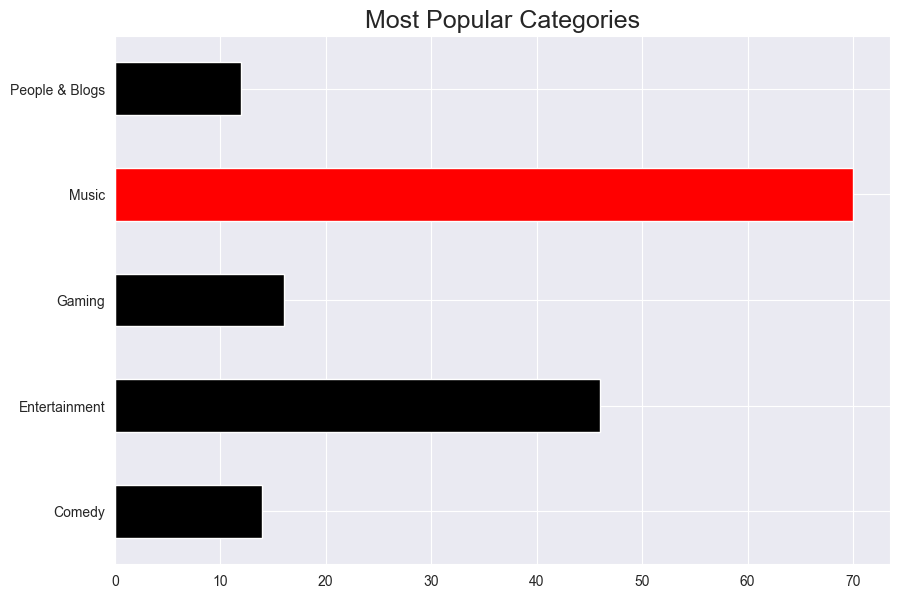

In [16]:
fig = plt.figure(figsize =(10, 7), dpi=100)
data['Main Video Category'].value_counts().nlargest(5).sort_index().plot.barh(color=['k','k','k','r','k'])
plt.title("Most Popular Categories", fontsize=18)
plt.show()

### Which Channels have the highest engagement rate?

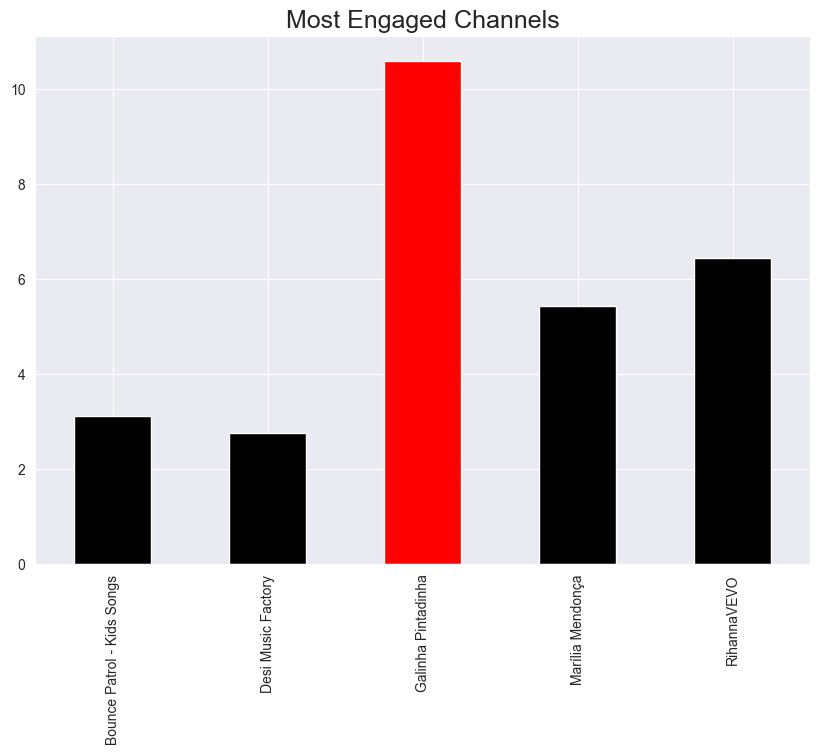

In [17]:
fig = plt.figure(figsize =(10, 7), dpi=100)
subscribers = data.groupby('Channel Name')['Engagement Rate'].sum().nlargest(5).sort_index().plot.bar(color=['k','k','r','k','k'])
plt.xlabel('')
plt.title("Most Engaged Channels", fontsize=18)
plt.show()